In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

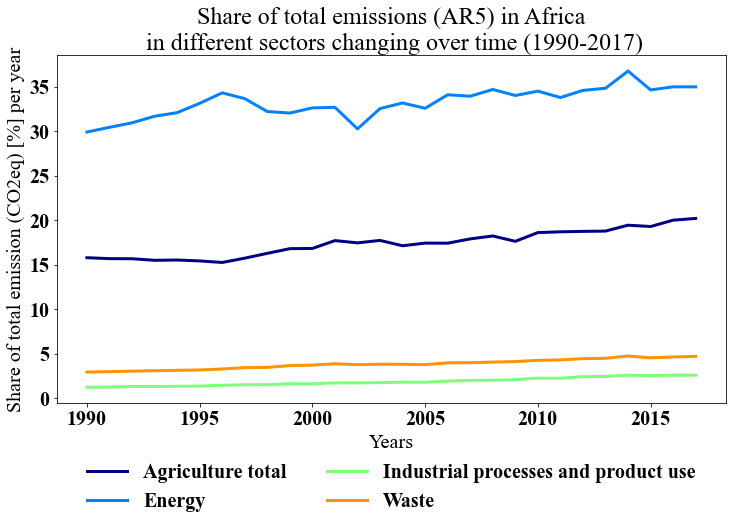

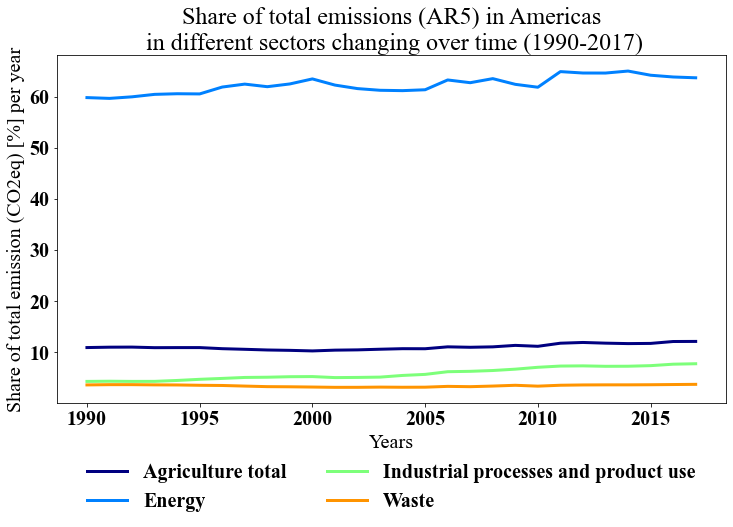

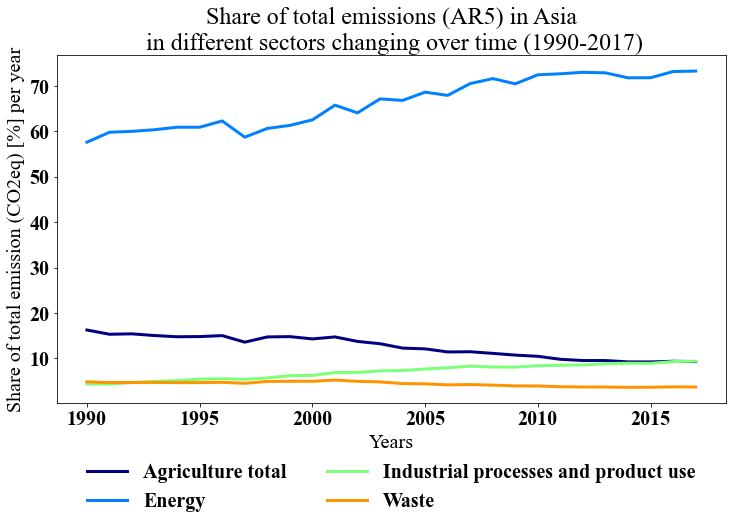

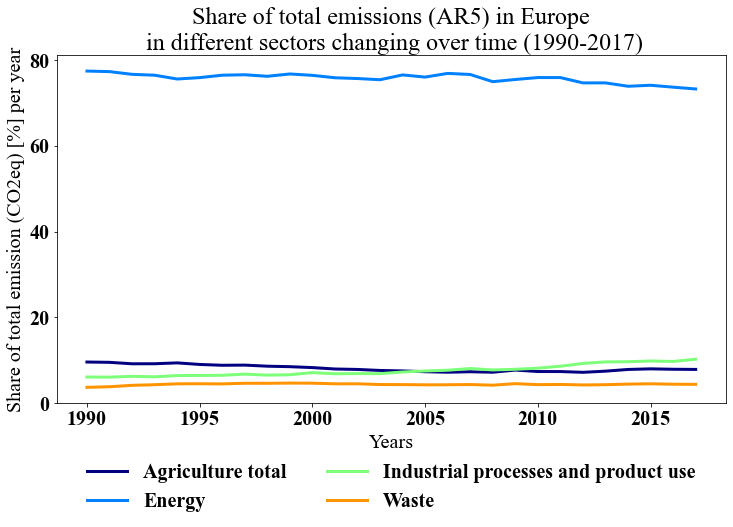

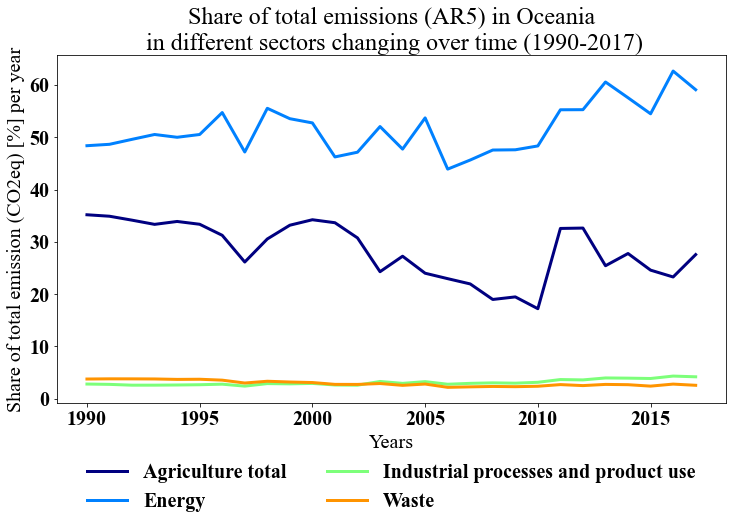

In [5]:
# Emissions per region over time in different sectors
# -----------------------------------------------------------------------------------------------------------------------

emissions_df = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/emissions shares/FAOSTAT_data_4-30-2021_(share_by_region_sector).csv')


def co2eqemissions_regions_sectors(region_name):
    font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 20}
    plt.rc('font', **font)
    fig, ax = plt.subplots(figsize=(12, 8))

    jet = plt.get_cmap('jet')
    colors = iter(jet(np.linspace(0, 1, 5)))

    for sector in emissions_df['Item'].unique():
        x = emissions_df.loc[(emissions_df['Item'] == sector)
                                 & (emissions_df['Area'] == region_name)
                             & (emissions_df['Element'] == 'Share of total emissions (AR5)')]['Year']
        y = emissions_df.loc[(emissions_df['Item'] == sector)
                                 & (emissions_df['Area'] == region_name)
                             & (emissions_df['Element'] == 'Share of total emissions (AR5)')]['Value']
        plt.plot(x, y, color=next(colors), label=sector, linewidth=3.0)

    plt.ylabel('Share of total emission (CO2eq) [%] per year')
    plt.xlabel('Years')
    plt.title('Share of total emissions (AR5) in ' + region_name +
              '\n in different sectors changing over time (1990-2017)')
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.2,
                     box.width, box.height * 0.8])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
              fancybox=True, shadow=True, ncol=2, borderaxespad=0, frameon=False)
    plt.show()


co2eqemissions_regions_sectors('Africa')
co2eqemissions_regions_sectors('Americas')
co2eqemissions_regions_sectors('Asia')
co2eqemissions_regions_sectors('Europe')
co2eqemissions_regions_sectors('Oceania')

0.9636457895093862
0.9713758373795828
0.8937333386680603
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


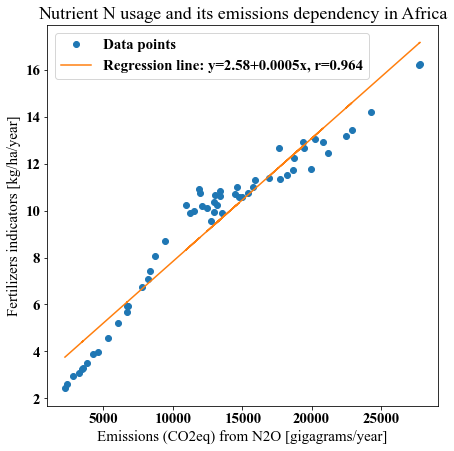

0.9983021331697097
0.9987849332894622
0.9839637364175107
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


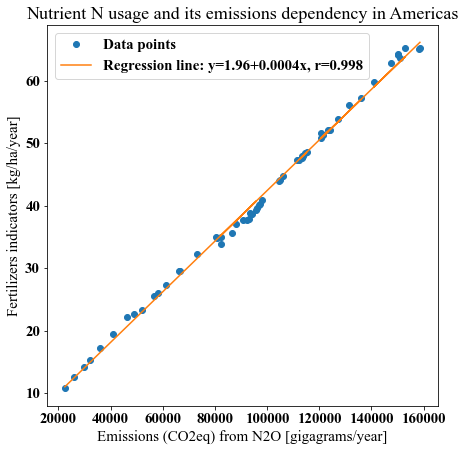

0.997342647841196
0.997785228705897
0.9794313369630973
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


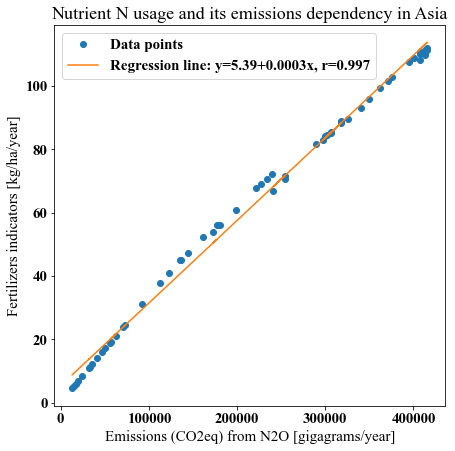

0.949087475522447
0.9128856624319421
0.8088324258923169
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


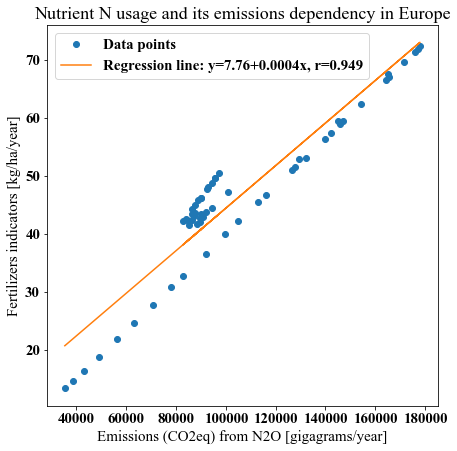

0.9379044629239096
0.9563197883662986
0.8548094373865698
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


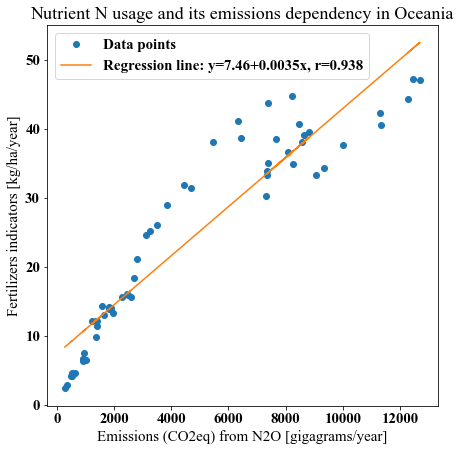

In [6]:
# Nitrogen inputs and nitrogen emissions correlation
# -----------------------------------------------------------------------------------------------------------------------

nitrogen_emissions_df = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/emissions shares/FAOSTAT_data_4-30-202190_(gg_nitrogen_firtilize).csv')
nutrients_region_df = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/nutrients_kg_ha/FAOSTAT_data_4-27-2021_(by region).csv')


def regression_plot(region_name):
    x = nitrogen_emissions_df.loc[(nitrogen_emissions_df['Element'] == 'Emissions (CO2eq) from N2O') &
                                  (nitrogen_emissions_df['Area'] == region_name)]['Value']
    y = nutrients_region_df.loc[(nutrients_region_df['Item'] == 'Nutrient nitrogen N (total)') &
                                (nutrients_region_df['Area'] == region_name)]['Value']

    x.index = np.arange(0, 58)
    y.index = np.arange(0, 58)

    cor_coef = x.corr(y)

    print(x.corr(y))
    print(x.corr(y, method='spearman'))
    print(x.corr(y, method='kendall'))

    x = x.to_numpy()
    y = y.to_numpy()

    print(type(x))
    print(type(y))

    slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
    line = f'Regression line: y={intercept:.2f}+{slope:.4f}x, r={cor_coef:.3f}'
    font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 15}
    plt.rc('font', **font)
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.plot(x, y, linewidth=0, marker='o', label='Data points')
    ax.plot(x, intercept + slope * x, label=line)
    ax.set_xlabel('Emissions (CO2eq) from N2O [gigagrams/year]')
    ax.set_ylabel('Fertilizers indicators [kg/ha/year]')
    ax.legend(facecolor='white')
    ax.set_title('Nutrient N usage and its emissions dependency in ' + region_name)
    plt.show()


regression_plot('Africa')
regression_plot('Americas')
regression_plot('Asia')
regression_plot('Europe')
regression_plot('Oceania')

